## Logistic reg:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("clean_tel.csv")
df.sample(5)

,Unnamed: 0,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
883,883,0,0,111.25,7511.65,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
293,293,0,1,89.35,567.80,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
1665,1665,0,0,76.85,663.55,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3063,3063,0,0,100.05,3810.55,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3388,3388,0,0,55.15,3673.15,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [3]:
df["Churn_Yes"].value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [4]:
X=df.loc[:,df.columns!="Churn_Yes"]
Y=df.loc[:,"Churn_Yes"]
X.head()

,Unnamed: 0,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,0,29.85,29.85,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,1,0,56.95,1889.50,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,1,0,53.85,108.15,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,1,0,42.30,1840.75,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,0,70.70,151.65,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0


In [5]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_Yes, dtype: int64

In [6]:
X.drop("Unnamed: 0",axis=1, inplace=True)
X.sample()

C:\Users\fer\AppData\Local\Temp\ipykernel_48228\3522425292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("Unnamed: 0",axis=1, inplace=True)


,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
3188,0,0,49.85,365.55,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


As we are training the dataset using Logistic regression, so lets scale the values.

In [8]:
sc=StandardScaler()
sc.fit(x_train)
x_train_scaled=sc.transform(x_train)
x_test_scaled=sc.transform(x_test)

In [9]:
x_train_scaled

array([[ 0.99610273, -0.44664195,  1.25178232, ..., -0.35259961,
        -0.3627017 , -0.49894591],
       [-1.00391252, -0.44664195, -0.1138783 , ..., -0.35259961,
        -0.3627017 , -0.49894591],
       [-1.00391252,  2.23892984,  1.23355141, ..., -0.35259961,
        -0.3627017 , -0.49894591],
       ...,
       [ 0.99610273, -0.44664195,  0.27228544, ..., -0.35259961,
        -0.3627017 ,  2.00422528],
       [ 0.99610273, -0.44664195,  0.8573318 , ..., -0.35259961,
        -0.3627017 , -0.49894591],
       [ 0.99610273, -0.44664195,  0.33526494, ..., -0.35259961,
        -0.3627017 , -0.49894591]])

We get an array after scaling so lets convert that back to dataframe.


In [10]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_test_scaled.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0.996103,-0.446642,1.147369,2.078667,1.028449,1.530889,0.327252,-0.961001,-0.327252,-0.719001,...,-0.536169,1.921221,-0.712762,-0.541379,-0.66874,-0.413307,-0.364579,-0.3526,-0.362702,2.004225
1,-1.003913,-0.446642,-1.156355,-0.993273,-0.972338,-0.653215,-3.055751,-0.961001,3.055751,1.390818,...,1.865084,-0.520502,-0.712762,-0.541379,1.49535,-0.413307,-0.364579,-0.3526,-0.362702,-0.498946
2,0.996103,-0.446642,-1.501085,-0.528013,1.028449,1.530889,0.327252,1.040581,-0.327252,-0.719001,...,-0.536169,1.921221,-0.712762,-0.541379,-0.66874,-0.413307,-0.364579,-0.3526,2.757087,-0.498946
3,-1.003913,-0.446642,-0.214977,0.848883,-0.972338,-0.653215,-3.055751,-0.961001,3.055751,1.390818,...,1.865084,-0.520502,-0.712762,-0.541379,-0.66874,-0.413307,-0.364579,-0.3526,-0.362702,2.004225
4,0.996103,-0.446642,-1.491140,-0.895515,1.028449,1.530889,0.327252,1.040581,-0.327252,-0.719001,...,-0.536169,-0.520502,-0.712762,1.847134,-0.66874,2.419507,-0.364579,-0.3526,-0.362702,-0.498946


In [11]:
np.round(x_train_scaled.describe(),1)

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
count,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,...,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0
mean,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-0.4,-1.5,-1.0,-1.0,-0.7,-3.1,-1.0,-0.3,-0.7,...,-0.5,-0.5,-0.7,-0.5,-0.7,-0.4,-0.4,-0.4,-0.4,-0.5
25%,-1.0,-0.4,-1.0,-0.8,-1.0,-0.7,0.3,-1.0,-0.3,-0.7,...,-0.5,-0.5,-0.7,-0.5,-0.7,-0.4,-0.4,-0.4,-0.4,-0.5
50%,1.0,-0.4,0.2,-0.4,-1.0,-0.7,0.3,-1.0,-0.3,-0.7,...,-0.5,-0.5,-0.7,-0.5,-0.7,-0.4,-0.4,-0.4,-0.4,-0.5
75%,1.0,-0.4,0.8,0.7,1.0,1.5,0.3,1.0,-0.3,1.4,...,-0.5,-0.5,1.4,-0.5,1.5,-0.4,-0.4,-0.4,-0.4,-0.5
max,1.0,2.2,1.8,2.8,1.0,1.5,0.3,1.0,3.1,1.4,...,1.9,1.9,1.4,1.8,1.5,2.4,2.7,2.8,2.8,2.0


*Effects of Scaling:*

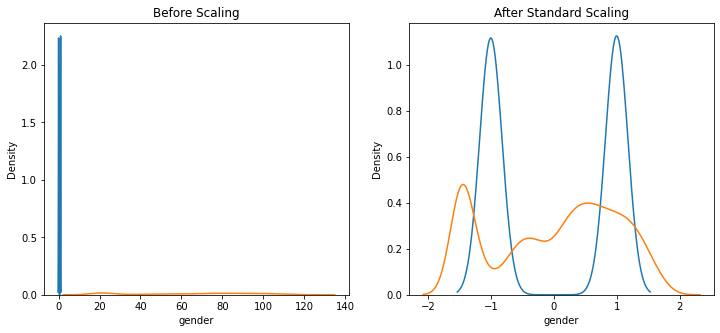

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["gender"],ax=ax1)
sns.kdeplot(x_train["MonthlyCharges"],ax=ax1)

#after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled["gender"], ax=ax2)
sns.kdeplot(x_train_scaled["MonthlyCharges"], ax=ax2)
plt.show()

As you can see that the values are now distributed close to each other which will help in getting better confusion matrix.

In [13]:
log_reg=LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [14]:
y_pred=log_reg.predict(x_test)

In [15]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


[[1049    0]
 [ 360    0]]
0.7444996451383961
0.0
0.0
0.0


c:\Users\fer\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see, our model is doing really bad as FN in confusion matrix is really high. This is because our dataset is highly imbalanced as we checked earlier. So lets perform upsampling.

In [16]:
# sm=SMOTEENN(random_state=42)
# x_resampled,y_resampled=sm.fit_resample(X, Y)

sm=SMOTE()
x_resampled,y_resampled=sm.fit_resample(X, Y)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
X.dtypes

gender                                       int64
SeniorCitizen                                int64
MonthlyCharges                             float64
TotalCharges                               float64
Partner_Yes                                  int64
Dependents_Yes                               int64
PhoneService_Yes                             int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_No internet service           int64
OnlineBackup_No                              int64
OnlineBackup_No internet service             int64
DeviceProtection_No                          int64
DeviceProtection_No internet service         int64
TechSupport_No                               int64
TechSupport_No internet service

In [19]:
col = np.array(X.columns)

for i in range(len(col)):
    print((X[col[i]]==None).value_counts())

False    7043
Name: gender, dtype: int64
False    7043
Name: SeniorCitizen, dtype: int64
False    7043
Name: MonthlyCharges, dtype: int64
False    7043
Name: TotalCharges, dtype: int64
False    7043
Name: Partner_Yes, dtype: int64
False    7043
Name: Dependents_Yes, dtype: int64
False    7043
Name: PhoneService_Yes, dtype: int64
False    7043
Name: MultipleLines_No, dtype: int64
False    7043
Name: MultipleLines_No phone service, dtype: int64
False    7043
Name: InternetService_DSL, dtype: int64
False    7043
Name: InternetService_Fiber optic, dtype: int64
False    7043
Name: InternetService_No, dtype: int64
False    7043
Name: OnlineSecurity_No, dtype: int64
False    7043
Name: OnlineSecurity_No internet service, dtype: int64
False    7043
Name: OnlineBackup_No, dtype: int64
False    7043
Name: OnlineBackup_No internet service, dtype: int64
False    7043
Name: DeviceProtection_No, dtype: int64
False    7043
Name: DeviceProtection_No internet service, dtype: int64
False    7043
Name: T